In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import torch 
import torch.nn as nn 
import torch.optim as optim 
from torch.utils.data import DataLoader, TensorDataset
from tqdm.auto import tqdm
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [11]:
X,y = load_iris().data, load_iris().target
scalar = StandardScaler()
X = scalar.fit_transform(X)
X_train, X_test , y_train , y_test = train_test_split(X, y,test_size=0.2, random_state=1234)
X_train = torch.from_numpy(X_train).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.long)
X_test = torch.from_numpy(X_test).type(torch.float)
y_test = torch.from_numpy(y_test).type(torch.long)

train_dataset = TensorDataset(X_train,y_train)
test_dataset = TensorDataset(X_test,y_test)

train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=50, shuffle=False)
X.shape , y_train.shape

((150, 4), torch.Size([120]))

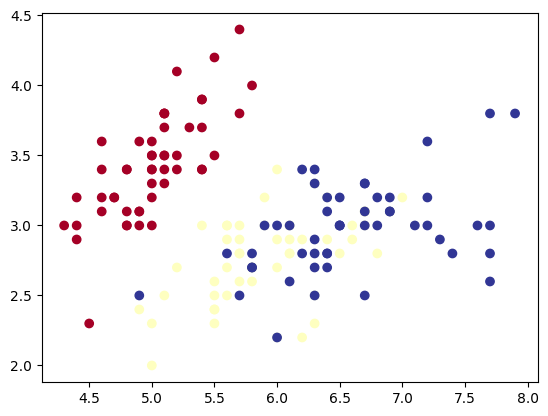

In [3]:
X,y = load_iris().data, load_iris().target
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [4]:
class Iris_2(nn.Module):
    def __init__(self,
                 input_features,
                 output_features,
                 hidden_units = 8):
        super().__init__()
        self.f1 = nn.Linear(input_features,output_features)
        self.network = nn.Sequential(
             nn.Linear(input_features,hidden_units),
             nn.ReLU(),
             nn.Linear(hidden_units,output_features)
        )
    def forward(self,x):
        return self.network(x)
        # return self.f1(x)

In [5]:
Model = Iris_2(4,3)
loss_fcn = nn.CrossEntropyLoss()
optimizer = optim.SGD(Model.parameters(),lr=0.01, momentum=0.9)

In [10]:
Model(X_train).shape

torch.Size([120, 3])

In [6]:
def accuracy(y_true,y_pred):
    correct = torch.eq(y_true,torch.round(y_pred)).sum().item()
    acc = (correct/len(y_pred)) * 100 
    return acc

In [7]:
epochs  = 3
 
train_loss , train_acc  = 0 , 0
for epoch in tqdm(range(epochs)):
    Model.train
    
    for x , y in train_loader:
        
        pred = Model(x)
        pred_prob = torch.softmax(pred,dim=1).argmax(dim=1)
        
        loss = loss_fcn(pred,y)
        train_loss += loss 
        
        train_acc += accuracy(y , pred_prob)

        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_loss /= len(train_loader)
    train_acc /= len(train_loader)
    a = y  
    test_loss , test_acc = 0 ,0     
    with torch.inference_mode():
        for x_test , y_test in test_loader:
            test_pred = Model(x_test)
            t_loss = loss_fcn(test_pred,y_test)
            test_loss += t_loss
            test_acc += accuracy(y_test,test_pred.argmax(1))
        
        test_loss /= len(test_loader)
        test_acc /= len(test_loader)
        
  
 
        print(f"Epoch: {epoch} |, loss : {loss:.4f} |, Acc: | {train_acc:.2f}% |, Test loss | {test_loss:.3f}, | test accuracy | {test_acc:.2f}% ")


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 |, loss : 1.1260 |, Acc: | 32.67% |, Test loss | 1.105, | test accuracy | 43.33% 
Epoch: 1 |, loss : 1.1593 |, Acc: | 39.56% |, Test loss | 1.067, | test accuracy | 43.33% 
Epoch: 2 |, loss : 1.0585 |, Acc: | 44.85% |, Test loss | 1.019, | test accuracy | 53.33% 


In [8]:
len(train_loader) , len(test_loader)

(3, 1)

In [9]:
pred.argmax(1) ==  a
# pred.argmax(1) , a

tensor([False, False, False, False, False, False,  True,  True,  True, False,
        False,  True, False,  True, False, False,  True, False, False,  True])